In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ted = pd.read_csv("ted talk.csv")
ted.isnull().sum()

title     0
author    1
date      0
views     0
likes     0
link      0
dtype: int64

In [ ]:
ted.head(5)

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


In [ ]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


In [ ]:
ted['date']=ted['date'].astype('datetime64')

In [ ]:
ted['year'] = ted['date'].dt.year
ted['month']=ted['date'].dt.month

In [ ]:
ted.nunique()

title     5440
author    4443
date       200
views      973
likes      753
link      5440
year        30
month       12
dtype: int64

In [ ]:
like_most = ted.sort_values(by=['likes'], ascending = False).head(10)
like_most[['author','likes']]

,author,likes
5436,Sir Ken Robinson,2100000
4084,Amy Cuddy,1900000
2958,Tim Urban,1800000
4605,Brené Brown,1700000
4765,Simon Sinek,1700000
3504,Julian Treasure,1400000
2168,Sam Berns,1300000
3251,Bill Gates,1300000
3017,Robert Waldinger,1200000
4990,Mary Roach,1100000


In [ ]:
views_most = ted.sort_values(by=['views'], ascending = False).head(10)
views_most[['author','views']]

,author,views
5436,Sir Ken Robinson,72000000
4084,Amy Cuddy,64000000
2958,Tim Urban,60000000
4765,Simon Sinek,57000000
4605,Brené Brown,56000000
3504,Julian Treasure,49000000
2168,Sam Berns,43000000
3251,Bill Gates,43000000
3017,Robert Waldinger,41000000
3994,Cameron Russell,38000000


In [ ]:
ted['engage']=ted['likes']/ted['views']*100
most_engage = ted.sort_values(by=['engage'], ascending = False).head(10)
most_engage.round(2)

,title,author,date,views,likes,link,year,month,engage
1112,The importance of queer allyship in the classroom,Coby Everton,2019-11-01,10000,329,https://ted.com/talks/coby_everton_the_importa...,2019,11,3.29
1071,Three stories of Scotland,Mackenzie Dalrymple,2019-07-01,11000,359,https://ted.com/talks/mackenzie_dalrymple_thre...,2019,7,3.26
3137,Imagining a new future for health systems in A...,Mathieu Lamiaux,2015-06-01,10000,326,https://ted.com/talks/mathieu_lamiaux_imaginin...,2015,6,3.26
1462,Solar energy can help put power back in the ha...,Scott Nguyen,2019-04-01,10000,326,https://ted.com/talks/scott_nguyen_solar_energ...,2019,4,3.26
1733,A brie(f) history of cheese,Paul S. Kindstedt,2018-12-01,11000000,358000,https://ted.com/talks/paul_s_kindstedt_a_brie_...,2018,12,3.25
2558,Why you should define your fears instead of yo...,Tim Ferriss,2017-04-01,10000000,325000,https://ted.com/talks/tim_ferriss_why_you_shou...,2017,4,3.25
2491,There's more to life than being happy,Emily Esfahani Smith,2017-04-01,11000000,357000,https://ted.com/talks/emily_esfahani_smith_the...,2017,4,3.25
1761,Cómo usar el arte de la fotografía para restau...,Alejandro Chaskielberg,2018-11-01,12000,389,https://ted.com/talks/alejandro_chaskielberg_c...,2018,11,3.24
2918,Why do cats act so weird?,Tony Buffington,2016-04-01,11000000,356000,https://ted.com/talks/tony_buffington_why_do_c...,2016,4,3.24
2247,How we'll predict the next refugee crisis,Rana Novack,2017-12-01,12000,388,https://ted.com/talks/rana_novack_how_we_ll_pr...,2017,12,3.23


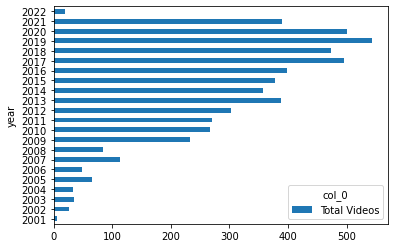

In [ ]:
ted_sort = ted[ted['year']>=2000]
total_yearlyvids = pd.crosstab(
    index=ted_sort['year'],
    columns='Total Videos'
)
total_yearlyvids.plot.barh()


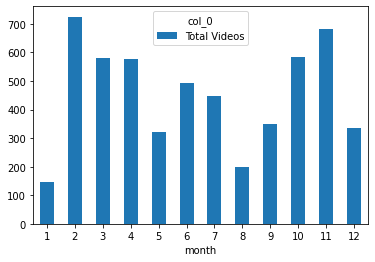

In [ ]:
total_monthlyvids = pd.crosstab(
    index=ted['month'],
    columns='Total Videos'
)

total_monthlyvids.plot.bar(rot=0)

In [ ]:
ted_author = ted[['author','likes','views']]
tg_likes = ted_author.groupby(['author']).sum().sort_values(by=['likes'] , ascending = False).head(5)
tg_likes['engagement'] = tg_likes['likes']/tg_likes['views']*100
tg_likes

,likes,views,engagement
author,,,
Alex Gendler,5691000,187196000,3.04
Sir Ken Robinson,2833600,95654000,2.96
Bill Gates,2349000,77800000,3.02
Simon Sinek,2246000,74800000,3.00
Brené Brown,2204000,72000000,3.06


In [ ]:
ted_author = ted[['author','likes','views']]
tg_views = ted_author.groupby(['author']).sum().sort_values(by=['views'] , ascending = False).head(5)
tg_views['engagement'] = tg_likes['likes']/tg_likes['views']*100
tg_views

,likes,views,engagement
author,,,
Alex Gendler,5691000,187196000,3.04
Sir Ken Robinson,2833600,95654000,2.96
Bill Gates,2349000,77800000,3.02
Simon Sinek,2246000,74800000,3.00
Brené Brown,2204000,72000000,3.06


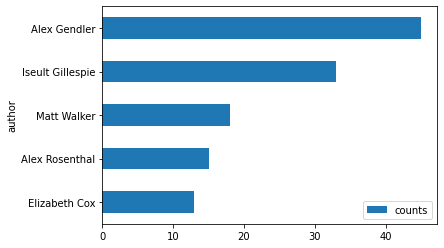

In [ ]:
ted_freqthor=ted_author['author'].value_counts().reset_index()
ted_freqthor.columns=['author','counts']
ted_freqthor.head(5).sort_values(by=['counts'],ascending = True).plot.barh(x='author',y='counts')